In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("simulation_data/smart2_sf_rp.csv", index_col=0)
df

,skull_factor,raise_thershold,win_count_score,win_count_elim
0,-0.5,0.000000,3689.0,1.0
1,-0.5,0.111111,3862.0,0.0
2,-0.5,0.222222,4308.0,6.0
3,-0.5,0.333333,4450.0,13.0
4,-0.5,0.444444,4713.0,17.0
...,...,...,...,...
95,3.0,0.555556,3332.0,98.0
96,3.0,0.666667,3468.0,153.0
97,3.0,0.777778,3417.0,255.0
98,3.0,0.888889,3128.0,333.0


In [3]:
df["total_wins"] = df["win_count_score"] + df["win_count_elim"]

In [4]:
df_select = df[["skull_factor", "raise_thershold", "total_wins"]]

df_select["total_wins"] = df_select["total_wins"] / 100

heatmap_data = df_select.pivot(index='raise_thershold', columns='skull_factor', values='total_wins')


/var/folders/j0/5vzg02dn3ln14ntm75wgfw140000gn/T/ipykernel_35055/1547521069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["total_wins"] = df_select["total_wins"] / 100


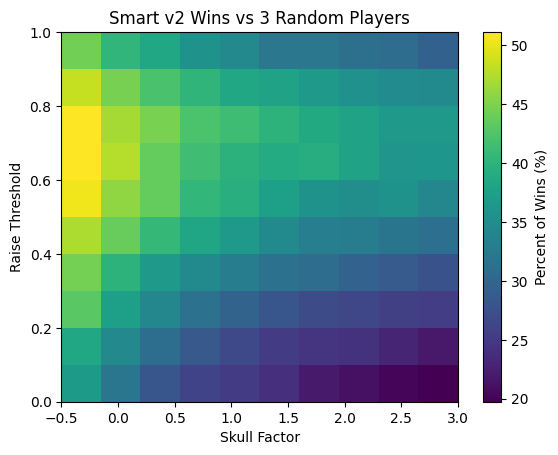

In [7]:
data_array = heatmap_data.values
plt.imshow(data_array, origin='lower', aspect='auto', cmap='viridis',
           extent=[df_select['skull_factor'].min(), df_select['skull_factor'].max(), df_select['raise_thershold'].min(), df_select['raise_thershold'].max()])
plt.colorbar(label='Percent of Wins (%)')
plt.xlabel("Skull Factor")
plt.ylabel("Raise Threshold")
plt.title("Smart v2 Wins vs 3 Random Players")
plt.show()

In [6]:
df_select[df_select["total_wins"] == max(df_select["total_wins"])]

,skull_factor,raise_thershold,total_wins
7,-0.5,0.777778,51.13
